# Apartment sales research

Data — the archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. 
There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and reservoir.

## Examining data from a file

The aim of this study is to analyze the archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years in order to determine the parameters that affect the market value of real estate objects, which will serve to build an automated system that detects anomalies and fraudulent activity. To do this, it is necessary to solve the following tasks:
    
1) study the data and their specifics;
    
2) carry out their preliminary processing so that the results of the analysis reflect real patterns, and not distorted due to the presence of inaccuracies or errors in the data;
    
3) conducting research data analysis;

4) the design of the general conclusion of the study.

Open the table with the provided data to study it:

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/a1/Desktop/data_folder/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Preliminary conclusion

Based on the initial acquaintance with the data, it follows that:
* the table contains 22 columns;
* the maximum number of filled rows is 23699 records;
* some of the columns contain data gaps, namely columns with names: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition;
* incorrect data types;
* incorrect column names.

## Data preprocessing

### Let's estimate the proportion of missing values for each column:

In [327]:
100 * data.isna().mean()

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

### Let's examine the value of each column separately:

Start with missing values in the column balcony.

In [328]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Based on the resulting output of unique values, it can be assumed that the existing omissions are due to the human factor and imply a value of 0. It is also necessary to replace the type of data values in this column from the float type to the int type.
Let's fix it:

In [329]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Let's change the incorrect name of the cityCenters_nearest column to the corresponding "clean" style:

In [330]:
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The is_apartment column has the most omissions, the percentage of omissions is 88%. Let's study the values of this column:

In [331]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Perhaps the lack of data is either a human factor (people do not additionally note the type of real estate, if it is not), or a temporary consequence, apartments as a type of housing appeared massively relatively recently. Therefore, we will replace the missing values with False:

In [332]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Let's put the value of the first_day_exposition column in a correct format:

In [333]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


The missing values in the floors_total and locality_name columns make up an insignificant fraction, so we will delete data with empty values from the table.

Study the value of column rooms:

In [334]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Define the proportion of 0 values in the column:

In [335]:
volume_0_rooms = 194 / len(data["rooms"])
print("The percentage of missing values in the column days_employed: {:.1%}".format(volume_0_rooms))

The percentage of missing values in the column days_employed: 0.8%


Since their percentage is insignificant, delete this data without harming the overall picture:

In [336]:
data.drop(data[data['rooms'] == 0].index, inplace=True)

data['rooms'].unique()
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23502 non-null  int64         
 1   last_price            23502 non-null  float64       
 2   total_area            23502 non-null  float64       
 3   first_day_exposition  23502 non-null  datetime64[ns]
 4   rooms                 23502 non-null  int64         
 5   ceiling_height        14422 non-null  float64       
 6   floors_total          23419 non-null  float64       
 7   living_area           21613 non-null  float64       
 8   floor                 23502 non-null  int64         
 9   is_apartment          23502 non-null  bool          
 10  studio                23502 non-null  bool          
 11  open_plan             23502 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Study the value of column total_images:

In [337]:
data['total_images'].value_counts()

10    1787
9     1717
20    1690
8     1566
7     1500
6     1474
11    1354
5     1278
12    1216
0     1044
13    1008
14     977
4      972
15     944
1      864
3      759
16     758
17     647
18     637
2      634
19     602
23      16
21      11
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

In [338]:
volume_0_total_images = 1044 / len(data["total_images"])
print("The percentage of missing values in the column rooms: {:.1%}".format(volume_0_total_images ))

The percentage of missing values in the column rooms: 4.4%


Since their percentage is less than 5%, we can delete this data without harming the overall picture:

In [339]:
data.drop(data[data['total_images'] == 0].index, inplace=True)

data['total_images'].unique()
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22458 entries, 0 to 22457
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22458 non-null  int64         
 1   last_price            22458 non-null  float64       
 2   total_area            22458 non-null  float64       
 3   first_day_exposition  22458 non-null  datetime64[ns]
 4   rooms                 22458 non-null  int64         
 5   ceiling_height        13889 non-null  float64       
 6   floors_total          22382 non-null  float64       
 7   living_area           20720 non-null  float64       
 8   floor                 22458 non-null  int64         
 9   is_apartment          22458 non-null  bool          
 10  studio                22458 non-null  bool          
 11  open_plan             22458 non-null  bool          
 12  kitchen_area          20549 non-null  float64       
 13  balcony         

Let's re-evaluate the proportion of missing values in the data:

In [340]:
100 * data.isna().mean()

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.155668
floors_total             0.338409
living_area              7.738890
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             8.500312
balcony                  0.000000
locality_name            0.213732
airports_nearest        23.243388
city_centers_nearest    23.149880
parks_around3000        23.145427
parks_nearest           65.606911
ponds_around3000        23.145427
ponds_nearest           61.394603
days_exposition         13.848072
dtype: float64

At the moment, there are still columns with a significant proportion of missing values, the impact of which is not obvious for the purposes of the study:
* ceiling_height          38.155668
* living_area              7.738890
* kitchen_area             8.500312
* airports_nearest        23.243388
* city_сenters_nearest    23.149880
* parks_around3000        23.145427
* parks_nearest           65.606911
* ponds_around3000        23.145427
* ponds_nearest           61.394603
* days_exposition         13.848072

As a result of data preprocessing, the dataset was examined in detail for the presence of omissions. Based on the type of data, we can assume that the gaps in the columns balcony, is_apartment are most likely related to the human factor. These omissions were processed without harm to the data.  Minor omissions in the columns floors_total, locality_name, rooms, total_images were also eliminated. At the same time, there are still columns with a significant proportion of omissions, their processing will be postponed for now, because their impact on the purpose of the study is not obvious.

## Calculate and add to the table

* price per square meter;
* day of the week, month and year of publication of the announcement;
* apartment floor; options — first, last, other;
* the ratio of residential and total area, as well as the ratio of kitchen area to total.

Find a price per square meter:

In [341]:
data['price_for_meter'] = data['last_price'] / data['total_area']
data['price_for_meter'] = data['price_for_meter'].astype('int')
data['price_for_meter'].unique()

array([120370,  82920,  92785, ...,  44091, 149511,  41795])

Find day of the week, month and year of publication of the announcement:

In [342]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Find the floor of the apartment; options — first, last, other. To do this, we will create data categorization functions:

First we need to prepare the data of the floor_total column to work with them:

In [343]:
data['floors_total'].isna().sum()

76

In [344]:
volume_nan_floors_total = 76 / len(data["floors_total"])
print("The percentage of missing values in the column floors_total: {:.1%}".format(volume_nan_floors_total))

The percentage of missing values in the column floors_total: 0.3%


Since their percentage is insignificant, we can delete this data without harming the overall picture:

In [345]:
data = data.dropna(subset=['floors_total']) 
data['floors_total'].unique()
data = data.reset_index(drop=True)
data['floors_total'] = data['floors_total'].astype('int')

In [346]:
def name_floor(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

data['name_floor'] = data.apply(name_floor, axis = 1)

We will find the ratio of residential and total area, as well as the ratio of the kitchen area to the total. To do this, we need to pre-process the gaps in the living_area and kitchen_area columns.
We have three elements pointing to the area, in order to set 1 unknown element, it is necessary to identify the other two, so we will check the proportion of data in the table that contain gaps simultaneously in the columns living_area and kitchen_area.

In [347]:
data_sorted = data.loc[
    (data['living_area'].isna()) &
    (data['kitchen_area'].isna())
]

data_sorted

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_exposition,month_exposition,year_exposition,name_floor
29,12,2200000.0,32.8,2018-02-19,1,NaN,9,NaN,2,False,...,NaN,NaN,NaN,NaN,63.0,67073,0,2,2018,other
36,10,1990000.0,45.8,2017-10-28,2,2.50,5,NaN,1,False,...,NaN,NaN,NaN,NaN,196.0,43449,5,10,2017,first
43,13,5350000.0,40.0,2018-11-18,1,NaN,22,NaN,3,False,...,1.0,620.0,1.0,1152.0,NaN,133750,6,11,2018,other
58,15,6300000.0,46.5,2017-03-06,1,NaN,13,NaN,13,False,...,0.0,NaN,0.0,NaN,336.0,135483,0,3,2017,last
59,3,2740000.0,35.0,2018-01-01,1,NaN,12,NaN,8,False,...,NaN,NaN,NaN,NaN,11.0,78285,0,1,2018,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22301,4,3950000.0,52.0,2018-03-04,3,NaN,5,NaN,2,False,...,0.0,NaN,0.0,NaN,45.0,75961,6,3,2018,other
22319,20,5000000.0,38.0,2018-06-23,1,2.55,16,NaN,15,False,...,1.0,241.0,1.0,230.0,113.0,131578,5,6,2018,other
22328,14,5950000.0,80.3,2018-07-03,3,2.70,12,NaN,5,False,...,0.0,NaN,2.0,562.0,60.0,74097,1,7,2018,other
22347,12,6400000.0,88.0,2018-01-12,4,2.55,10,NaN,1,False,...,0.0,NaN,2.0,844.0,59.0,72727,4,1,2018,first


In [348]:
volume_sorted_area = 1288 / len(data["total_area"])
print("The percentage of missing values in the column sorted_area: {:.1%}".format(volume_sorted_area))

The percentage of missing values in the column sorted_area: 5.8%


Unfortunately, in the area data there are no omissions of 2 elements at the same time in 5.8%. We cannot neglect these data and delete them, so we will fill in the gaps in these columns with median values.

In [349]:
data['living_area'] = data['living_area'].fillna(data['living_area'].mean())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22382 entries, 0 to 22381
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22382 non-null  int64         
 1   last_price            22382 non-null  float64       
 2   total_area            22382 non-null  float64       
 3   first_day_exposition  22382 non-null  datetime64[ns]
 4   rooms                 22382 non-null  int64         
 5   ceiling_height        13881 non-null  float64       
 6   floors_total          22382 non-null  int64         
 7   living_area           22382 non-null  float64       
 8   floor                 22382 non-null  int64         
 9   is_apartment          22382 non-null  bool          
 10  studio                22382 non-null  bool          
 11  open_plan             22382 non-null  bool          
 12  kitchen_area          22382 non-null  float64       
 13  balcony         

In [350]:
data['ratio_liv_to_total'] = data['living_area'] / data['total_area']
data['ratio_kitch_to_total'] = data['kitchen_area'] / data['total_area']

## Research data analysis

### Study the following parameters: area, price, number of rooms, ceiling height

Study the data from the total_area column:

<AxesSubplot:ylabel='Frequency'>

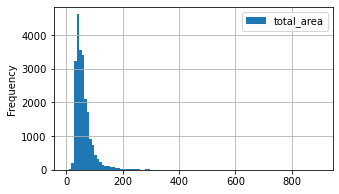

In [351]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,900))

The histogram shows that the distribution of values in the total_area column is generally normal, although there are minor outliers. Look at them by requesting a list of characteristic values:

In [352]:
data['total_area'].describe()

count    22382.000000
mean        60.816581
std         35.888997
min         12.000000
25%         40.300000
50%         52.200000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

(1.0, 150.0)

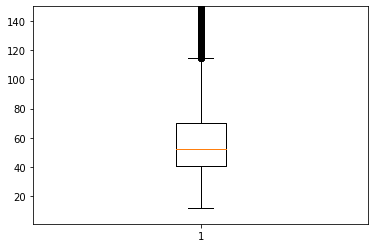

In [353]:
import matplotlib.pyplot as plt
plt.boxplot(data['total_area'])
plt.ylim(1,150) 

Based on the list of characteristic values and the histogram, we can say that the average area of apartments is 60.8 square meters, the median is 52.2 square meters, while the data contains information about the area of apartments from 12 to 900 square meters. meters. Thus, based on the scope of the distribution, the data on the area of the apartment is more than ~120 sq. m. meters - are abnormal.

Study the data from the column last_price:

<AxesSubplot:ylabel='Frequency'>

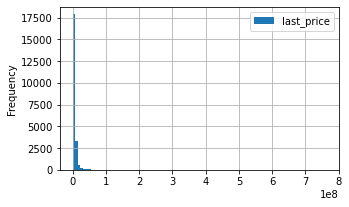

In [354]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,data['last_price'].max()))

Convert the value into prices in millions for ease of perception:

In [355]:
data['last_price'] = data['last_price'] / 1000000
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_exposition,month_exposition,year_exposition,name_floor,ratio_liv_to_total,ratio_kitch_to_total
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00000,8,False,...,2.0,755.0,NaN,120370,3,3,2019,other,0.472222,0.231481
1,7,3.350,40.40,2018-12-04,1,NaN,11,18.60000,1,False,...,0.0,NaN,81.0,82920,1,12,2018,first,0.460396,0.272277
2,10,5.196,56.00,2015-08-20,2,NaN,5,34.30000,4,False,...,2.0,574.0,558.0,92785,3,8,2015,other,0.612500,0.148214
3,2,10.000,100.00,2018-06-19,2,3.03,14,32.00000,13,False,...,1.0,48.0,121.0,100000,1,6,2018,other,0.320000,0.410000
4,10,2.890,30.40,2018-09-10,1,NaN,12,14.40000,5,False,...,NaN,NaN,55.0,95065,0,9,2018,other,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22377,9,9.700,133.81,2017-03-21,3,3.70,5,73.30000,3,False,...,3.0,381.0,NaN,72490,1,3,2017,other,0.547792,0.103356
22378,14,3.100,59.00,2018-01-15,3,NaN,5,38.00000,4,False,...,NaN,NaN,45.0,52542,0,1,2018,other,0.644068,0.144068
22379,18,2.500,56.70,2018-02-11,2,NaN,3,29.70000,1,False,...,NaN,NaN,NaN,44091,6,2,2018,first,0.523810,0.187170
22380,13,11.475,76.75,2017-03-28,2,3.00,17,34.67412,12,False,...,3.0,196.0,602.0,149511,1,3,2017,other,0.451780,0.303583


<AxesSubplot:ylabel='Frequency'>

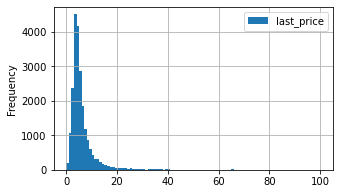

In [356]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))

In [357]:
data['last_price'].describe()

count    22382.000000
mean         6.627152
std         11.133026
min          0.012190
25%          3.476250
50%          4.700000
75%          6.850000
max        763.000000
Name: last_price, dtype: float64

(1.0, 15.0)

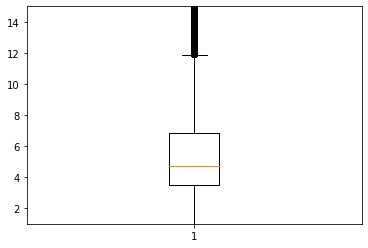

In [358]:
plt.boxplot(data['last_price'])
plt.ylim(1,15) 

The histogram shows that the data is distributed correctly - we can say that the average cost of an apartment is 6.6 million, the median is 4.7 million, while the data contains information about the cost of an apartment from 12,190 units to 763 million. Thus, based on the scope of the distribution, the data on the cost of an apartment of more than ~ 12 million is anomalous.

Study the data from the column rooms:

<AxesSubplot:ylabel='Frequency'>

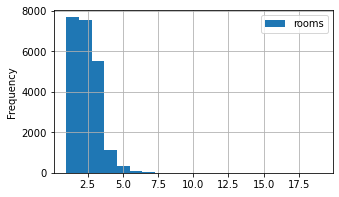

In [359]:
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (5,3))

The histogram shows that the distribution of values in the rooms column is generally normal. Look at them by requesting a list of characteristic values:

In [360]:
data['rooms'].describe()

count    22382.000000
mean         2.090206
std          1.069517
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(1.0, 10.0)

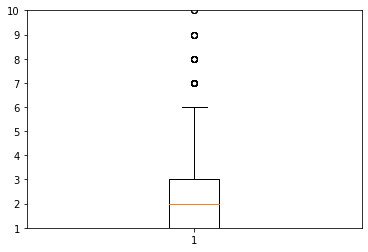

In [361]:
plt.boxplot(data['rooms'])
plt.ylim(1,10) 

The histogram shows that the data is distributed correctly - we can say that the average number of rooms in an apartment is 2 rooms, the median is also 2 rooms, while the data contains information about the number of rooms in an apartment from 1 room to 19 rooms. Most of all there are one-room apartments. Based on the scope of the distribution, apartments with more than 6 rooms are rare or an anomaly.

Study the data from the column ceiling_height:

<AxesSubplot:ylabel='Frequency'>

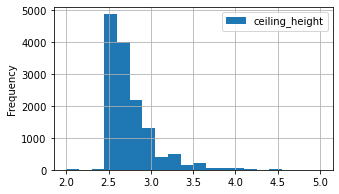

In [362]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (2, 5))

The histogram shows that the data is generally distributed correctly, but there are outliers with data on the ceiling height in the range from 2 to ~ 2.4 meters. Request a list of characteristic values:

In [363]:
data['ceiling_height'].describe()

count    13881.000000
mean         2.759122
std          0.886955
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

The histogram shows that the data are distributed in general correctly - we can say that the average ceiling height in the apartment is 2.7 meters, the median is also 2.6 meters, while the data contains information about the ceiling height in the apartment from 1 meter to 32 meters. Most often there are apartments with a ceiling height of 2.5 meters.

### Study the time of sale of the apartment

Study the time of sale of the apartment. To do this, check if there are gaps in the days_exposition column:

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22382 entries, 0 to 22381
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22382 non-null  int64         
 1   last_price            22382 non-null  float64       
 2   total_area            22382 non-null  float64       
 3   first_day_exposition  22382 non-null  datetime64[ns]
 4   rooms                 22382 non-null  int64         
 5   ceiling_height        13881 non-null  float64       
 6   floors_total          22382 non-null  int64         
 7   living_area           22382 non-null  float64       
 8   floor                 22382 non-null  int64         
 9   is_apartment          22382 non-null  bool          
 10  studio                22382 non-null  bool          
 11  open_plan             22382 non-null  bool          
 12  kitchen_area          22382 non-null  float64       
 13  balcony         

In [365]:
volume_nan_days_exposition = (len(data["days_exposition"]) - 19280) / len(data["days_exposition"])
print("The percentage of missing values in the column days_exposition: {:.1%}".format(volume_nan_days_exposition))

The percentage of missing values in the column days_exposition: 13.9%


We cannot delete this data because its value cannot be neglected. Therefore, we will replace these omissions with median values:

In [366]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22382 entries, 0 to 22381
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22382 non-null  int64         
 1   last_price            22382 non-null  float64       
 2   total_area            22382 non-null  float64       
 3   first_day_exposition  22382 non-null  datetime64[ns]
 4   rooms                 22382 non-null  int64         
 5   ceiling_height        13881 non-null  float64       
 6   floors_total          22382 non-null  int64         
 7   living_area           22382 non-null  float64       
 8   floor                 22382 non-null  int64         
 9   is_apartment          22382 non-null  bool          
 10  studio                22382 non-null  bool          
 11  open_plan             22382 non-null  bool          
 12  kitchen_area          22382 non-null  float64       
 13  balcony         

In [367]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_exposition,month_exposition,year_exposition,name_floor,ratio_liv_to_total,ratio_kitch_to_total
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00000,8,False,...,2.0,755.0,183.381172,120370,3,3,2019,other,0.472222,0.231481
1,7,3.350,40.40,2018-12-04,1,NaN,11,18.60000,1,False,...,0.0,NaN,81.000000,82920,1,12,2018,first,0.460396,0.272277
2,10,5.196,56.00,2015-08-20,2,NaN,5,34.30000,4,False,...,2.0,574.0,558.000000,92785,3,8,2015,other,0.612500,0.148214
3,2,10.000,100.00,2018-06-19,2,3.03,14,32.00000,13,False,...,1.0,48.0,121.000000,100000,1,6,2018,other,0.320000,0.410000
4,10,2.890,30.40,2018-09-10,1,NaN,12,14.40000,5,False,...,NaN,NaN,55.000000,95065,0,9,2018,other,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22377,9,9.700,133.81,2017-03-21,3,3.70,5,73.30000,3,False,...,3.0,381.0,183.381172,72490,1,3,2017,other,0.547792,0.103356
22378,14,3.100,59.00,2018-01-15,3,NaN,5,38.00000,4,False,...,NaN,NaN,45.000000,52542,0,1,2018,other,0.644068,0.144068
22379,18,2.500,56.70,2018-02-11,2,NaN,3,29.70000,1,False,...,NaN,NaN,183.381172,44091,6,2,2018,first,0.523810,0.187170
22380,13,11.475,76.75,2017-03-28,2,3.00,17,34.67412,12,False,...,3.0,196.0,602.000000,149511,1,3,2017,other,0.451780,0.303583


Replace the values of the days_exposition column with integer values for convenience:

In [368]:
data['days_exposition'] = data['days_exposition'].astype('int')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_exposition,month_exposition,year_exposition,name_floor,ratio_liv_to_total,ratio_kitch_to_total
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00000,8,False,...,2.0,755.0,183,120370,3,3,2019,other,0.472222,0.231481
1,7,3.350,40.40,2018-12-04,1,NaN,11,18.60000,1,False,...,0.0,NaN,81,82920,1,12,2018,first,0.460396,0.272277
2,10,5.196,56.00,2015-08-20,2,NaN,5,34.30000,4,False,...,2.0,574.0,558,92785,3,8,2015,other,0.612500,0.148214
3,2,10.000,100.00,2018-06-19,2,3.03,14,32.00000,13,False,...,1.0,48.0,121,100000,1,6,2018,other,0.320000,0.410000
4,10,2.890,30.40,2018-09-10,1,NaN,12,14.40000,5,False,...,NaN,NaN,55,95065,0,9,2018,other,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22377,9,9.700,133.81,2017-03-21,3,3.70,5,73.30000,3,False,...,3.0,381.0,183,72490,1,3,2017,other,0.547792,0.103356
22378,14,3.100,59.00,2018-01-15,3,NaN,5,38.00000,4,False,...,NaN,NaN,45,52542,0,1,2018,other,0.644068,0.144068
22379,18,2.500,56.70,2018-02-11,2,NaN,3,29.70000,1,False,...,NaN,NaN,183,44091,6,2,2018,first,0.523810,0.187170
22380,13,11.475,76.75,2017-03-28,2,3.00,17,34.67412,12,False,...,3.0,196.0,602,149511,1,3,2017,other,0.451780,0.303583


Make a diagram of the scope:

(1.0, 1580.0)

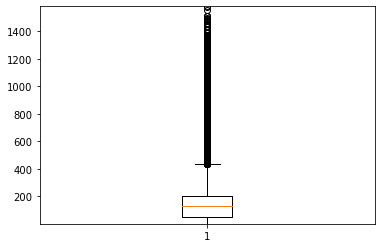

In [369]:
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,data['days_exposition'].max())

It can be seen from the diagram that there are many outliers with the number of exposure days over 400 days to 1580 days. Build two histograms using these values:

Build a histogram of the values of the days_exposition column:

<AxesSubplot:ylabel='Frequency'>

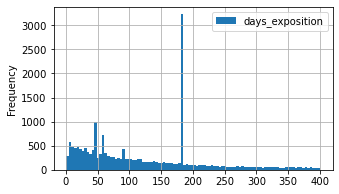

In [370]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1,400))

<AxesSubplot:ylabel='Frequency'>

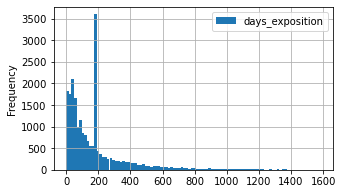

In [371]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1,1580))

Request a list of characteristic values:

In [372]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    22382.000000
mean       183.328344
std        205.038938
min          1.000000
25%         47.000000
50%        129.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

Based on the list of characteristic values, we can say that the average number of days of ad placement is 183 days, the median is 129 days, while the data contains information about the duration of ad placement from 1 day to 1580 days. Based on the scope of the distribution, the duration of ad placement of more than 400 days is a rarity or anomaly. Find the number of the brightest anomalies:

In [373]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

183     3129
45       757
60       489
7        212
90       193
        ... 
795        1
1089       1
807        1
978        1
971        1
Name: days_exposition, Length: 1133, dtype: int64

The most striking anomalies in the duration of ad placement are the following periods equal to 183 days, 45 days, 60 days, 7 days, 90 days. Based on the specifics of these numbers, the duration of ad placement is limited to these numbers, possibly as a result of differences in the type and cost of ad placement: a week, 1.5 months, 2 months, 3 months, half a year + 3 days (error or bonus).

Build the histogram again within the normal range:

<AxesSubplot:ylabel='Frequency'>

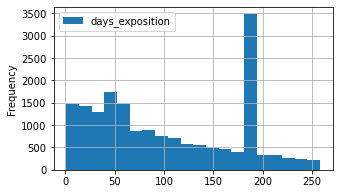

In [374]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,258))

Obviously, the values that stand out are those that indicate the withdrawal of the ad after 183, 45, 60.7 and 90 days. It is necessary to request information about such features from the customer of the study.

### Remove rare and erratic values. Describe what features have been found.

Create a new data frame with data cleared of anomalies:

In [375]:
clean_data = data.query('days_exposition != 183 and days_exposition != 45 and days_exposition != 60 and days_exposition != 7 and days_exposition != 90')

Build boxplot:

(1.0, 1580.0)

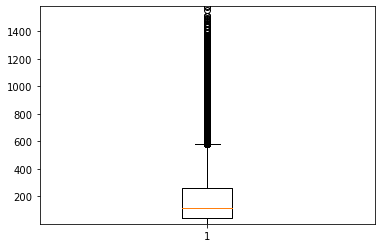

In [376]:
plt.boxplot(clean_data['days_exposition'])
plt.ylim(1,1580)

Build histograms:

<AxesSubplot:ylabel='Frequency'>

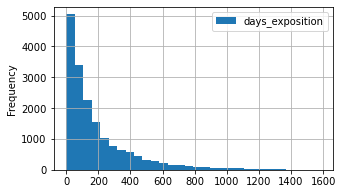

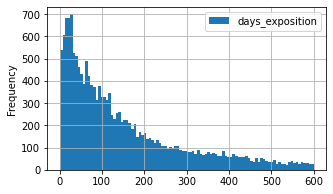

In [377]:
clean_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (1,1580))
clean_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1,600))

In [378]:
clean_data['days_exposition'].describe()

count    17602.000000
mean       195.908931
std        227.122055
min          1.000000
25%         44.000000
50%        113.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

Thus, filtering data from anomalies helped to identify more correct data: the duration of ad placement is from 1 to 1580 days, the average duration of ad placement is 195 days, the median is 113 days. Based on the scope of the distribution, the duration of the ad placement of more than 600 days is an anomaly. At the same time, most often the ad is closed after 44 days. If an ad is closed earlier than 195 days, it is on average faster than it happens. An ad taken earlier than 44 days is a very fast result, later than 600 days is a very slow result.

Remove the abnormal values in the ceiling_height and last_price columns from the dataset:

In [379]:
clean_data = clean_data.query('ceiling_height != 32 and last_price != 0.012190')

In [380]:
clean_data = clean_data.query('ceiling_height != 1 and rooms < 6 and last_price < 12 and total_area < 120')

Additionally, rare and erratic values in such columns as ceiling height, number of rooms, price and area of real estate were excluded from the data.

### What factors most affect the cost of an apartment? 
We need to check whether the price depends on the area, number of rooms, distance from the center; the dependence of the price on which floor the apartment is located: the first, last or other; as well as the dependence of the price on the date of placement: day of the week, month and year.

Study the dependence of the price of an apartment on its area using summary tables:

-0.07434448346909604

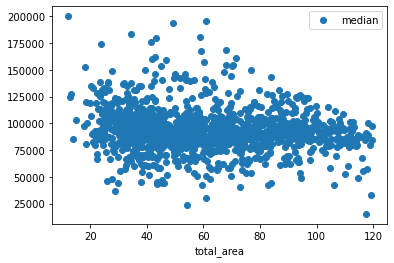

In [381]:
total_area_pivot_table = clean_data.pivot_table(index = 'total_area', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
total_area_pivot_table.columns = ['mean', 'count', 'median']
total_area_pivot_table.plot(y = 'median', style = 'o')

total_area_pivot_table.sort_values('median', ascending = False)

clean_data['total_area'].corr(clean_data['price_for_meter'])

The graph shows that the correlation between the two parameters is low (0.321) and the increase in the cost per square meter with an increase in the area of the apartment occurs, but weakly.

Study the dependence of the price of an apartment on the number of its rooms using summary tables. To do this, first investigate the presence of abnormal values:

(0.0, 10.0)

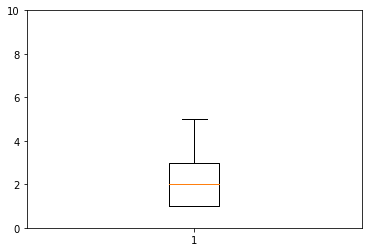

In [382]:
plt.boxplot(clean_data['rooms'])
plt.ylim(0,10)

Based on the range of a set of data, we see that the number of rooms more than 6 is an anomaly. Study the dependence using this data:

-0.23124112812463843

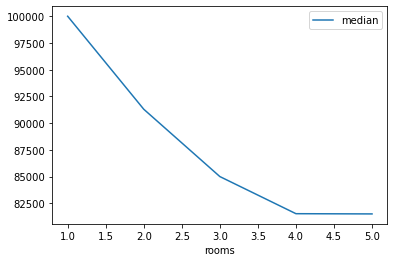

In [383]:
rooms_pivot_table = clean_data.pivot_table(index = 'rooms', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
rooms_pivot_table.columns = ['mean', 'count', 'median']
rooms_pivot_table.query('count > 6').plot(y = 'median')

rooms_pivot_table.query('count > 6').sort_values('median', ascending = False)

clean_data['rooms'].corr(data['price_for_meter'])


Based on the graph, we see that the cost per square meter is gradually decreasing in apartments up to 3 rooms, but then increases. This is probably due to the fact that the number of rooms in an apartment is up to 3 pieces - often due to the need to accommodate a standard number of family members, and not the redundancy of opportunities, whereas the number of rooms is more than 3 - more common among wealthier people, which affects prices accordingly. 

Study the dependence of the price of an apartment on its distance from the center:

-0.3951090911065823

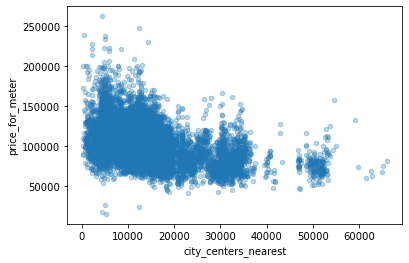

In [384]:
clean_data.plot(kind = 'scatter', y = 'price_for_meter', x = 'city_centers_nearest', alpha = 0.3)

clean_data['city_centers_nearest'].corr(clean_data['price_for_meter'])

The expected reality was confirmed - the closer the apartment is to the city center, the higher its cost.

Study the dependence of the apartment price on the floor:

,mean,count,median
name_floor,,,
first,78929.669462,2027,80405
last,84615.069565,2185,86315
other,95927.774856,11979,95592


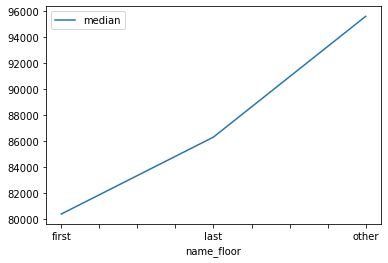

In [385]:
name_floor_center_pivot_table = clean_data.pivot_table(index = 'name_floor', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
name_floor_center_pivot_table.columns = ['mean', 'count', 'median']
name_floor_center_pivot_table.plot(y = 'median')
name_floor_center_pivot_table

Based on the graph, we see that the apartments located on the first floor are expected to be cheaper than the rest of the apartments. At the same time, apartments on the last (highest) floor are cheaper than apartments located on other floors (not the first).

Study the dependence of the apartment price on the date of placement: day of the week, month and year:

1. Study the dependence of the apartment price on the day of the week of the ad placement:

,mean,count,median
weekday_exposition,,,
2,92423.333208,2662,93273.5
3,92657.146940,2974,93103.0
0,92632.221949,2442,92857.0
1,92370.690401,2865,92857.0
4,91923.865296,2821,92152.0
6,91682.696729,1131,91611.0
5,91465.776235,1296,91152.0


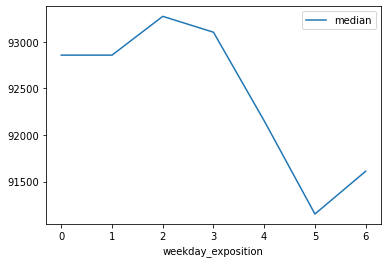

In [386]:
weekday_exposition_pivot_table = clean_data.pivot_table(index = 'weekday_exposition', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
weekday_exposition_pivot_table.columns = ['mean', 'count', 'median']
weekday_exposition_pivot_table.plot(y = 'median')

weekday_exposition_pivot_table.sort_values('median', ascending = False)

Based on the graph, we see the following dynamics of price changes: apartments for sale in the first half of the week are more expensive (the cost of an apartment gradually increases by Wednesday), then we see a sharp decline in the cost of apartments for sale in the second half of the week. Perhaps this dynamic is due to the fact that people tend to start something at the beginning of the week and are positive, but their expectations are adjusted over time towards more realistic (more adequate to the demand price).

2. Study the dependence of the apartment price on the month of placement of the ad:

,mean,count,median
month_exposition,,,
8,94166.413230,1285,94370.0
1,93254.679435,992,94062.0
9,93882.709566,1453,93859.0
2,92189.586833,1762,93273.5
11,92029.182456,1710,92786.0
10,92010.938596,1596,92752.0
3,92103.722884,1595,92500.0
7,91892.573517,1231,92222.0
5,92310.529609,895,91632.0


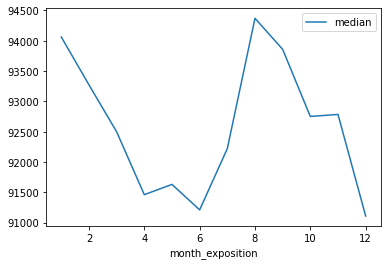

In [387]:
month_exposition_pivot_table = clean_data.pivot_table(index = 'month_exposition', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
month_exposition_pivot_table.columns = ['mean', 'count', 'median']
month_exposition_pivot_table.plot(y = 'median')

month_exposition_pivot_table.sort_values('median', ascending = False)

It follows from the graph that there is a seasonality of demand for apartments, which affects their cost. So, from January to April, the cost of apartments decreases, from April to June - the market stagnates and prices for apartments are minimal, from June to August - a sharp revival in demand and a corresponding increase in the cost of apartments, which will then decrease again by December. At the same time, on the chart - we see two significant peaks in the maximum cost of apartments - these are January and August-September. The first peak may be due to the widespread payment of annual premiums, the second - the beginning of the educational year and the need to purchase housing for moving / starting an independent life for students.

3. Study the dependence of the apartment price on the year of placement of the ad:

,mean,count,median
year_exposition,,,
2019,102975.591166,883,103076.0
2014,97421.270270,74,97257.0
2018,93440.649218,5884,94555.0
2015,91646.854749,895,90615.0
2017,90658.836277,6285,90611.0
2016,89510.165899,2170,89449.5


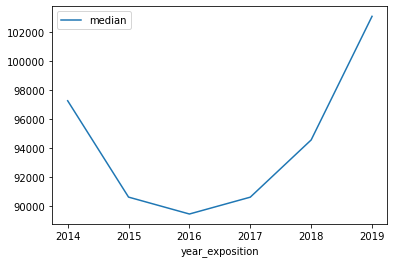

In [388]:
year_exposition_pivot_table = clean_data.pivot_table(index = 'year_exposition', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
year_exposition_pivot_table.columns = ['mean', 'count', 'median']
year_exposition_pivot_table.plot(y = 'median')

year_exposition_pivot_table.sort_values('median', ascending = False)

From the graph we can see that from 2014 to 2016 the cost of apartments decreased. After 2016, the cost of apartments began to increase, perhaps this is due to the adaptation of the market, the availability of preferential credit conditions in banks.

### Select 10 localities with the largest number of ads. Calculate the average price per square meter in these localities. Select the localities with the highest and lowest cost of housing. This data can be found by name in the locality_name column.

In [389]:
locality_name_pivot_table = clean_data.pivot_table(index = 'locality_name', values = 'price_for_meter', aggfunc=['count', 'mean'])
locality_name_pivot_table.columns = ['count', 'mean']
locality_name_pivot_table = locality_name_pivot_table.sort_values('count', ascending = False).head(10)
locality_name_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,10564,104491.948883
посёлок Мурино,437,84891.064073
посёлок Шушары,347,77893.585014
Всеволожск,289,66895.294118
посёлок Парголово,254,90022.074803
Пушкин,245,100651.053061
Колпино,238,74999.794118
деревня Кудрово,237,91846.966245
Гатчина,233,67301.806867


Thus, most of the ads are published in the following localities:
* Saint Petersburg 11900	
* Murino village 437	
* Shushary village 347	
* Vsevolozhsk 291	
* Pushkin 266	
* village of Pargolovo 255	
* Kolpino 241	
* Kudrovo village 238	
* Gatchina 236	
* Vyborg 175	
The most expensive real estate is located in St. Petersburg, the cheapest is in Vyborg.

### Study the apartment offers: for each apartment there is information about the distance to the center. Select apartments in St. Petersburg (locality_name). Our task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: round up to integer values. After that, calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Determine the boundary where the graph changes a lot — this will be the central zone.

Allocate apartments in St. Petersburg to a separate dataset:

In [390]:
spb_data = clean_data.query('locality_name == "Санкт-Петербург"')
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10564 entries, 2 to 22380
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          10564 non-null  int64         
 1   last_price            10564 non-null  float64       
 2   total_area            10564 non-null  float64       
 3   first_day_exposition  10564 non-null  datetime64[ns]
 4   rooms                 10564 non-null  int64         
 5   ceiling_height        6605 non-null   float64       
 6   floors_total          10564 non-null  int64         
 7   living_area           10564 non-null  float64       
 8   floor                 10564 non-null  int64         
 9   is_apartment          10564 non-null  bool          
 10  studio                10564 non-null  bool          
 11  open_plan             10564 non-null  bool          
 12  kitchen_area          10564 non-null  float64       
 13  balcony         

Study the distance in St. Petersburg:

,price_for_meter
city_center_km,
0.208,172619.0
0.215,109900.0
0.287,88796.0
0.329,100000.0
0.392,200348.0
...,...
28.015,68478.0
28.644,85190.5
28.806,79890.0


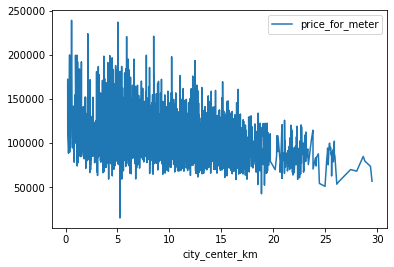

In [391]:
#spb_data['city_center_km'] 
pd.options.mode.chained_assignment = None
spb_data['city_center_km'] = spb_data['city_centers_nearest'] / 1000
spb_data
spb_data['city_center_km'] = spb_data['city_center_km'].fillna(999999)
clean_data['city_center_km'] = spb_data['city_center_km'].astype('int')
pivot_table_km = spb_data.query('city_center_km !=999999').pivot_table(index = 'city_center_km', values = 'price_for_meter', aggfunc= 'mean')
pivot_table_km.plot()
pivot_table_km 

Based on the graph, it follows that the most striking price per square meter changes at a distance of about 5 km from the center. Thus, the center includes offers located at a distance of 5 km from the center.

### Select the segment of apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad). Draw conclusions. Do they differ from the general conclusions throughout the database?

Select a segment of apartments in the center:

In [392]:
center_spb_data = spb_data.query('city_center_km <= 5')

Study the area of apartments in the center:

<AxesSubplot:ylabel='Frequency'>

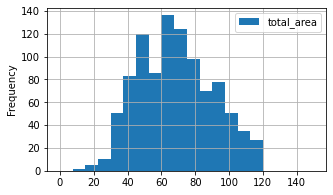

In [393]:
center_spb_data.plot(y = 'total_area', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,150))

It follows from the graph that most often in the center of St. Petersburg there are apartments with an area of 60-80 sq. m. meters.

Study the cost of apartments in the center:

<AxesSubplot:ylabel='Frequency'>

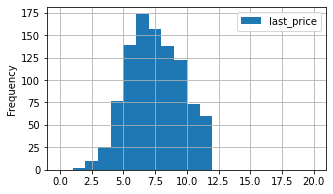

In [394]:
center_spb_data.plot(y = 'last_price', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,20))

It follows from the graph that apartments with a cost of 6 to 7 million are most often found in the center of St. Petersburg.

Study the number of rooms in apartments in the center:

<AxesSubplot:ylabel='Frequency'>

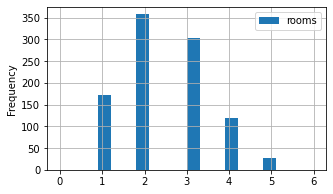

In [395]:
center_spb_data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,6))

It follows from the graph that apartments with 3 rooms are most often found in the center of St. Petersburg.

Study the ceiling height in apartments in the center:

<AxesSubplot:ylabel='Frequency'>

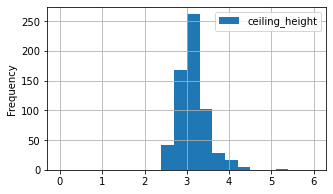

In [396]:
center_spb_data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,6))

It follows from the graph that apartments with a ceiling height of 3 meters are most often found in the center of St. Petersburg.

Thus, apartments with an area of 60-80 square meters, worth from 6 to 7 million, with 3 rooms and a ceiling height of 3 meters are most often offered for purchase in the center of St. Petersburg

Determine the dependence of the cost of an apartment on the number of rooms:

-0.5255849667299208

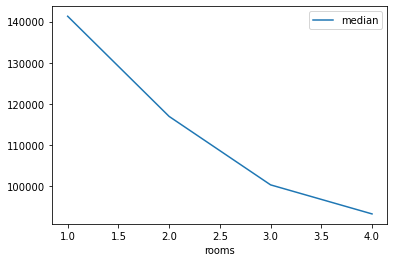

In [397]:
rooms_center_spb_data = center_spb_data.pivot_table(index = 'rooms', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
rooms_center_spb_data.columns = ['mean', 'count', 'median']
rooms_center_spb_data.query('count > 50').plot(y = 'median')

rooms_center_spb_data.query('count > 50').sort_values('median', ascending = False)

center_spb_data['rooms'].corr(center_spb_data['price_for_meter'])

The correlation is very low, but there is a decrease in the cost per square meter depending on the increase to 4 rooms. At the same time, after 4, the cost of a square meter increases. But this correlation is insignificant.

Determine the dependence of the cost of the apartment on the floor:

,mean,count,median
name_floor,,,
first,106202.254902,153,100000
last,109751.389474,190,103896
other,118855.312796,633,112781


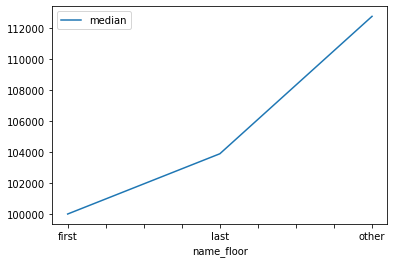

In [398]:
name_floor_center_spb_data = center_spb_data.pivot_table(index = 'name_floor', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
name_floor_center_spb_data.columns = ['mean', 'count', 'median']
name_floor_center_spb_data.plot(y = 'median')
name_floor_center_spb_data

Based on the data graph, it follows that apartments on the first floor in the center of St. Petersburg are not popular and are cheaper than other apartments. At the same time, it is likely that the last floors are less popular than other floors for buying an apartment. Perhaps this is due to the old housing stock in the center and the fear of buying an apartment under the roof due to weather conditions.

Determine the dependence of the apartment cost on its distance from the center:

0.04765219462386057

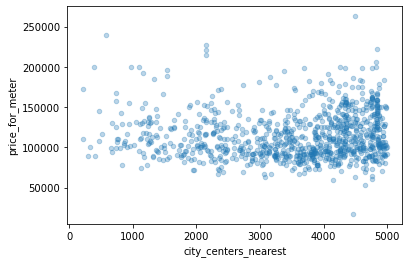

In [399]:
center_spb_data.plot(kind = 'scatter', y = 'price_for_meter', x = 'city_centers_nearest', alpha = 0.3)

center_spb_data['city_centers_nearest'].corr(center_spb_data['price_for_meter'])

Based on the graph, we see that there is no obvious dependence, this is probably due to the fact that the data is already grouped closer to the center.

Determine the dependence of the cost of the apartment on the date of placement of the ad:
1. Weekday:

,mean,count,median
weekday_exposition,,,
5,122000.637681,69,118867.0
0,119451.933775,151,114519.0
4,114471.878788,165,111111.0
2,117036.807692,156,108151.0
3,112181.018605,215,106844.0
6,118494.821429,56,103124.5
1,109643.932927,164,102500.0


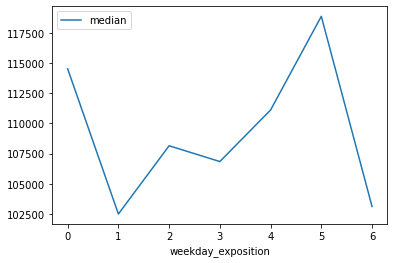

In [400]:
weekday_exposition_center_spb_data = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
weekday_exposition_center_spb_data.columns = ['mean', 'count', 'median']
weekday_exposition_center_spb_data.plot(y = 'median')

weekday_exposition_center_spb_data.sort_values('median', ascending = False)

Based on the graph, it follows that ads for apartments in the center of St. Petersburg contain higher prices if placed on Monday and Saturday. Whereas on Tuesday - Thursday, the ads contain a lower price. 

2. Month:

,mean,count,median
month_exposition,,,
12,117589.661972,71,116161.0
9,121883.714286,91,115789.0
8,115883.113924,79,111368.0
5,119842.344262,61,111111.0
3,116655.955056,89,110966.0
1,115944.241935,62,108530.0
4,114621.513889,72,108425.5
10,111193.433735,83,108333.0
7,114449.934066,91,106837.0


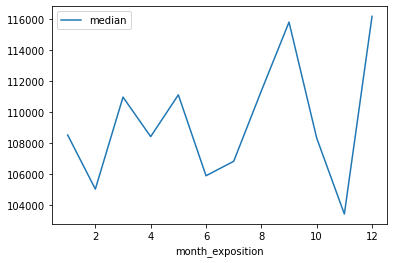

In [401]:
month_exposition_center_spb_data = center_spb_data.pivot_table(index = 'month_exposition', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
month_exposition_center_spb_data.columns = ['mean', 'count', 'median']
month_exposition_center_spb_data.plot(y = 'median')

month_exposition_center_spb_data.sort_values('median', ascending = False)

It follows from the graph that the highest demand (high price) is observed in March, August and December. Whereas the decline of the real estate sale season occurs from March to June. The decline in the market from March to June can be explained by the onset of public holidays and the tourist season from St. Petersburg, during which it is not profitable to sell real estate.

3. Year:

,mean,count,median
year_exposition,,,
2019,127614.441176,34,125681.0
2018,118516.143345,293,113333.0
2017,115459.925558,403,108139.0
2016,111859.202797,143,102903.0
2014,99654.000000,4,99946.5
2015,104526.959596,99,98256.0


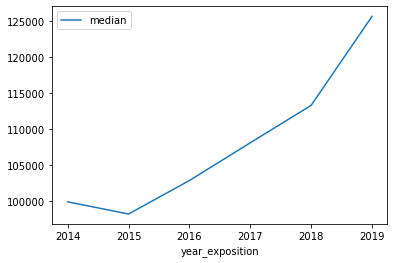

In [402]:
year_exposition_center_spb_data = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_for_meter', aggfunc = ['mean', 'count', 'median'])
year_exposition_center_spb_data.columns = ['mean', 'count', 'median']
year_exposition_center_spb_data.plot(y = 'median')

year_exposition_center_spb_data.sort_values('median', ascending = False)

It follows from the graph that from 2014 to 2015 there was a strong decline in the real estate market in the center of St. Petersburg. At the same time, after 2015, the real estate market has adapted: the price of real estate is steadily increasing without declines.

Thus, based on the analysis of real estate in the center of St. Petersburg, we can say the following:
* apartments with an area of 60-80 sq. m. meters, worth from 6 to 7 million, having 3 rooms and a ceiling height of 3 meters are most often offered for purchase in the center of St. Petersburg;
* the number of rooms in an apartment in the center and the distance from the center - do not have a significant impact on the cost of the apartment, whereas in the general sample of data - proximity to the center increased the cost of the apartment, and the proximity of rooms to 3 reduced the cost per square meter;
* in the center of St. Petersburg and in other places - apartments on the first floor are not popular and are cheaper than other apartments. At the same time, it is likely that the last floors are less popular than other floors for buying an apartment. Perhaps this is due to the fear of buying an apartment under the roof due to weather conditions;
* in the center of St. Petersburg, ads for the sale of apartments contain a higher price on Monday and Saturday, whereas in the general sample the price in the first half of the week is usually higher than in the second half;
* the most expensive months to purchase an apartment in the center of St. Petersburg are March, August and December, according to the general sample - January and August-September.

## Overall conclusion

To prepare this analysis, we opened the file and pre-examined the data, as a result of which omissions, incorrect data types and incorrect dataframe values were identified and processed, possible causes of their occurrence were analyzed. Further, new columns with data on the cost per square meter were calculated and added to the dataframe, the result of categorization by floors of the location of apartments, the ratio of areas, the dates of publication of ads were put in order. This allowed us to move on to research data analysis.

As part of the research data analysis, we analyzed such parameters as: area, price, number of rooms, ceiling height. The existing anomalies in these parameters were identified, investigated and, if possible, eliminated. At the same time, periods were identified, at the end of which the ads were most often removed from publication - the data on this should be clarified with colleagues (the initiator of the task). In addition, it was revealed that in the whole sample:
* proximity to the center increased the cost of the apartment, and the proximity of rooms to 3 reduced the cost per square meter of the apartment, 
* the floor of the apartment affects the price of the apartment - the first floor has the lowest cost, then by a large margin comes the cost of the apartment on the top floor, the most expensive are apartments on other floors;
* the period of placement of the ad also affects the cost of the apartment - so it was revealed that in August the cost of the apartment is always high.

At the same time, it is important to remember that when analyzing the data, we did not take into account inflation and the real purchasing ability of buyers, which may affect the value of the apartment in time, and not in absolute values.